# Travelling Salesperson Problem solved using genetic algorithms

In [1]:
# Imports
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [63, 33],
 'London': [7, 77],
 'Moscow': [36, 26],
 'Barcelona': [55, 59],
 'Rome': [2, 31],
 'Paris': [33, 29],
 'Vienna': [61, 68],
 'Munich': [32, 32],
 'Istanbul': [65, 84],
 'Kyiv': [11, 60],
 'Bucharest': [46, 31],
 'Minsk': [49, 33],
 'Warsaw': [27, 13],
 'Budapest': [0, 41],
 'Milan': [50, 18],
 'Prague': [47, 96],
 'Sofia': [87, 66],
 'Birmingham': [82, 46],
 'Brussels': [46, 36],
 'Amsterdam': [70, 97]}

## 1. Create the first population set
We randomly shuffle the cities N times where N=population_size

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Sofia', 'Prague', 'Milan', ..., 'Budapest', 'Rome', 'Minsk'],
       ['Vienna', 'Warsaw', 'Barcelona', ..., 'London', 'Amsterdam',
        'Birmingham'],
       ['Minsk', 'Istanbul', 'Milan', ..., 'Vienna', 'Budapest',
        'Prague'],
       ...,
       ['Minsk', 'Warsaw', 'Barcelona', ..., 'Berlin', 'Istanbul',
        'Budapest'],
       ['Milan', 'Barcelona', 'Paris', ..., 'Vienna', 'London', 'Munich'],
       ['Kyiv', 'Birmingham', 'Budapest', ..., 'Brussels', 'Prague',
        'Barcelona']], dtype='<U10')

## 2. Evaluate solutions fitness
The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first.
The fitness function needs to compute the distance between subsequent cities.

In [5]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [6]:
cities_dict

{'Berlin': [63, 33],
 'London': [7, 77],
 'Moscow': [36, 26],
 'Barcelona': [55, 59],
 'Rome': [2, 31],
 'Paris': [33, 29],
 'Vienna': [61, 68],
 'Munich': [32, 32],
 'Istanbul': [65, 84],
 'Kyiv': [11, 60],
 'Bucharest': [46, 31],
 'Minsk': [49, 33],
 'Warsaw': [27, 13],
 'Budapest': [0, 41],
 'Milan': [50, 18],
 'Prague': [47, 96],
 'Sofia': [87, 66],
 'Birmingham': [82, 46],
 'Brussels': [46, 36],
 'Amsterdam': [70, 97]}

In [7]:
population_set

array([['Sofia', 'Prague', 'Milan', ..., 'Budapest', 'Rome', 'Minsk'],
       ['Vienna', 'Warsaw', 'Barcelona', ..., 'London', 'Amsterdam',
        'Birmingham'],
       ['Minsk', 'Istanbul', 'Milan', ..., 'Vienna', 'Budapest',
        'Prague'],
       ...,
       ['Minsk', 'Warsaw', 'Barcelona', ..., 'Berlin', 'Istanbul',
        'Budapest'],
       ['Milan', 'Barcelona', 'Paris', ..., 'Vienna', 'London', 'Munich'],
       ['Kyiv', 'Birmingham', 'Budapest', ..., 'Brussels', 'Prague',
        'Barcelona']], dtype='<U10')

In [8]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([ 723.81542751,  844.97757773,  835.64599582,  711.02795976,
       1020.2217238 ,  879.75762481,  832.96978971,  790.68230564,
        791.98042564, 1009.24955918,  817.49958385,  841.28231181,
        834.63739912,  923.0956906 ,  920.62608904,  665.13320727,
        956.76040083,  829.24370578,  874.22584445,  815.71177275,
        835.46325093,  860.24822854,  951.07201866,  944.61991814,
        935.73220803,  854.19700234,  839.50551418,  895.52002875,
        901.63734249,  823.34376046,  974.79709927,  781.69904373,
        788.60101074,  768.45883219,  917.36046836,  929.44814694,
        819.6229568 ,  861.62518068,  841.97666975,  897.31158693,
        911.62900897,  824.5955664 ,  996.17904369,  867.10755914,
        937.85239495,  870.53702633,  908.01772319,  812.12413155,
        897.14464716,  747.5458693 ,  880.17438399,  888.53080229,
        783.36454022,  865.50341878,  933.41348305,  838.67828715,
        876.53039224,  720.03220263,  909.71993644,  838.60162

# 3. Progenitors selection
I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [9]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['London', 'Moscow', 'Vienna', 'Bucharest', 'Warsaw', 'Amsterdam',
       'Birmingham', 'Rome', 'Istanbul', 'Berlin', 'Sofia', 'Budapest',
       'Barcelona', 'Paris', 'Kyiv', 'Prague', 'Minsk', 'Milan',
       'Brussels', 'Munich'], dtype='<U10')

# 4. Mating
For each pair of  parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [10]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Paris', 'Birmingham', 'Warsaw', 'Prague', 'Brussels', 'Munich',
       'Amsterdam', 'Minsk', 'Barcelona', 'Istanbul', 'Bucharest', 'Kyiv',
       'Sofia', 'London', 'Rome', 'Budapest', 'Berlin', 'Vienna',
       'Moscow', 'Milan'], dtype='<U10')

# 5. Mutation
Now for each element of the new population we add a random chance of swapping

In [11]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Paris', 'Birmingham', 'London', 'Prague', 'Budapest', 'Bucharest',
       'Warsaw', 'Minsk', 'Berlin', 'Istanbul', 'Munich', 'Kyiv',
       'Vienna', 'Amsterdam', 'Rome', 'Brussels', 'Barcelona', 'Sofia',
       'Moscow', 'Milan'], dtype='<U10')

# 6. Stopping
To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 1000 iterations.

In [13]:
best_solution = [-1,np.inf,np.array([])]
generaciones=10000
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%100==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())


    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)

In [14]:
best_solution

[3915,
 470.9051520457569,
 array([['London', 'Moscow', 'Munich', 'Barcelona', 'Birmingham', 'Sofia',
         'Vienna', 'Amsterdam', 'Istanbul', 'Prague', 'Brussels',
         'Bucharest', 'Minsk', 'Berlin', 'Milan', 'Warsaw', 'Rome',
         'Budapest', 'Kyiv', 'Paris']], dtype='<U10')]

# 7. Laboratory
To make a real analysis about what is going on whit this problem, we change the selection method, but first we define a function to graph the results

In [15]:
def graficar(x, y, titulo="", etiqueta_x="", etiqueta_y="",tipo=int):

    plt.plot(x, y,'o',label=etiqueta_y)

    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    if tipo==0:
      min_y = min(y)
      min_y_index = y.index(min_y)

    # Destaca el valor mínimo agregando un círculo rojo y un texto
      plt.plot(x[min_y_index], min_y, 'ro')  # Círculo rojo en el valor mínimo
      plt.text(x[min_y_index], min_y, f'Minimum total: {min_y}', fontsize=7, ha='right', va='bottom')

    plt.grid(True)

    plt.show()

## 7.1 Graphics Roulette method
We change the number of generations
### 7.1.1 10.000 Gens


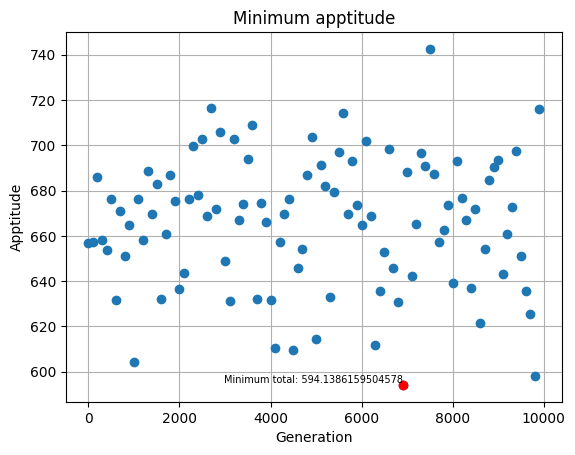

In [16]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

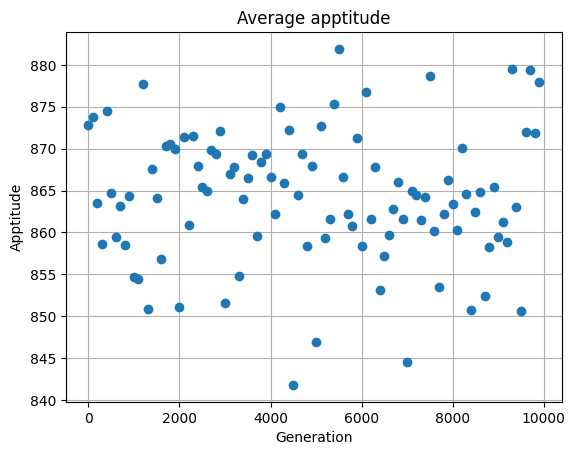

In [17]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

### 7.1.2 1.000 Gens

In [18]:
best_solution = [-1,np.inf,np.array([])]
generaciones=1000
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%50==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())
      print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))

    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

0 702.256717353032 867.3943141953085 05/12/23 14:36
50 637.3909766383418 858.8191147414128 05/12/23 14:36
100 684.7179762451699 868.2318661186264 05/12/23 14:36
150 701.2747810541892 872.0942871363754 05/12/23 14:36
200 670.5305160745096 854.869491364454 05/12/23 14:36
250 721.46363405047 873.4728202543027 05/12/23 14:36
300 662.3492338109461 864.7263877115271 05/12/23 14:36
350 635.4490158625171 864.6302664718708 05/12/23 14:36
400 685.2121968774296 864.6019719747475 05/12/23 14:36
450 713.2819208048782 860.9510409688494 05/12/23 14:36
500 677.4337139393388 864.7547081526282 05/12/23 14:36
550 673.6274129463372 859.736202810039 05/12/23 14:36
600 633.1243186466287 864.4998169727821 05/12/23 14:36
650 666.0758193747286 855.7765959386229 05/12/23 14:36
700 610.6099225016726 850.130782632563 05/12/23 14:36
750 687.485731623979 876.0839946779156 05/12/23 14:36
800 664.4052655661119 855.6562560926659 05/12/23 14:36
850 629.7606791557189 861.6889618089585 05/12/23 14:36
900 663.746573708959

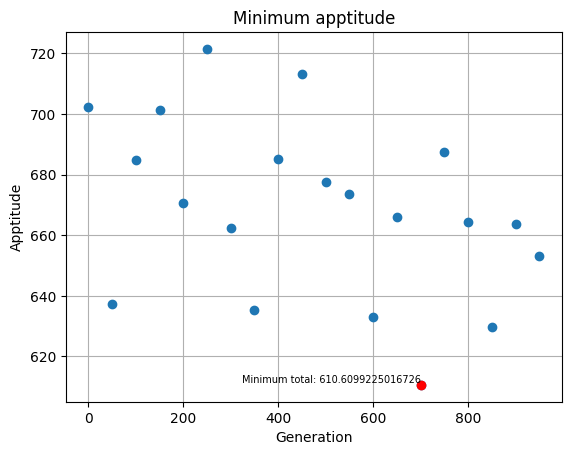

In [19]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

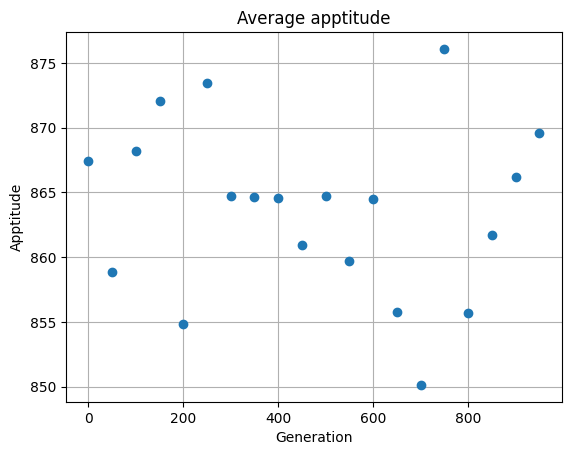

In [20]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

### 7.1.3 500 Gens

In [21]:
best_solution = [-1,np.inf,np.array([])]
generaciones=500
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%50==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())
      print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))

    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

0 634.9088067400373 863.2245056807378 05/12/23 14:36
50 660.5672841242807 858.9260505251159 05/12/23 14:36
100 688.3686594491435 856.1392176413965 05/12/23 14:36
150 634.8566436830208 857.4666400279738 05/12/23 14:36
200 652.1185644688333 868.5531997123849 05/12/23 14:36
250 697.5365341779706 870.9139672488033 05/12/23 14:36
300 602.0764490039605 865.2944845656971 05/12/23 14:36
350 643.5405106541283 868.2221927105732 05/12/23 14:36
400 706.4002913019558 877.7087410224013 05/12/23 14:36
450 715.5054398493317 872.1471994504026 05/12/23 14:37


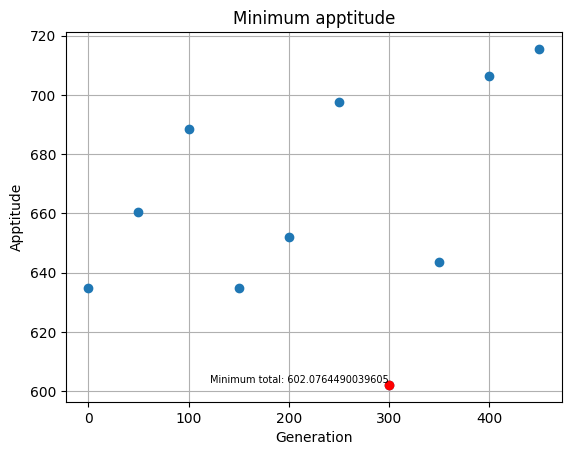

In [22]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

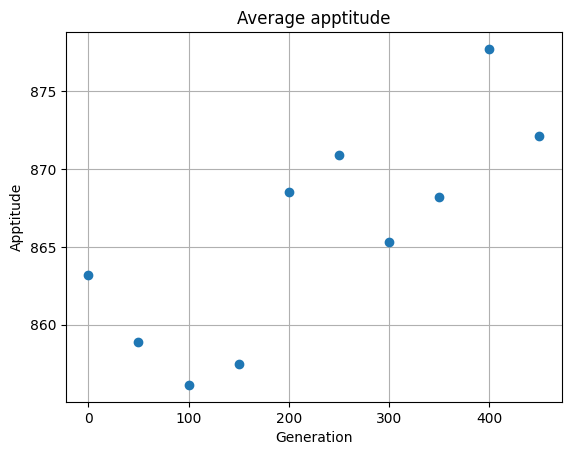

In [23]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

## 7.2 Tournament Selection
We change the selection type to a tournament selection, In tournament selection, several individuals are randomly selected from the population and their fitness is compared. The fittest individual among those selected is chosen as the parent. This process is repeated several times to select the parents of the next generation


In [24]:

def tournament_selection(population_set,fitnes_list,tournament_size):
    parents=0
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    groups = [fitnes_list[i:i+10] for i in range(0, len(fitnes_list), 10)]
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = []
    progenitor_list_b = []
    for _ in range(len(population_set)):
        # Elegir dos individuos aleatoriamente para el torneo
        tournament_indices = np.random.choice(len(population_set), size=10, replace=False)
        tournament_fitness = [fitnes_list[i] for i in tournament_indices]

        # Seleccionar al individuo con la aptitud más alta en el torneo como progenitor A
        progenitor_a_index = tournament_indices[np.argmax(tournament_fitness)]
        progenitor_list_a.append(population_set[progenitor_a_index])

        # Elegir nuevamente a los participantes para el torneo (puede ser el mismo individuo)
        tournament_indices = np.random.choice(len(population_set), size=10, replace=False)
        tournament_fitness = [fitnes_list[i] for i in tournament_indices]

        # Seleccionar al individuo con la aptitud más alta en el torneo como progenitor B
        progenitor_b_index = tournament_indices[np.argmax(tournament_fitness)]
        progenitor_list_b.append(population_set[progenitor_b_index])

    return np.array([progenitor_list_a, progenitor_list_b])



progenitor_list = tournament_selection(population_set,fitnes_list,7)
progenitor_list

array([[['Barcelona', 'Sofia', 'Kyiv', ..., 'Milan', 'Prague',
         'Bucharest'],
        ['Vienna', 'Paris', 'Istanbul', ..., 'London', 'Amsterdam',
         'Brussels'],
        ['Milan', 'Budapest', 'Warsaw', ..., 'Berlin', 'London',
         'Moscow'],
        ...,
        ['Brussels', 'Munich', 'Prague', ..., 'Amsterdam', 'Istanbul',
         'Berlin'],
        ['Amsterdam', 'Milan', 'Prague', ..., 'Kyiv', 'Rome',
         'Budapest'],
        ['Milan', 'Budapest', 'Warsaw', ..., 'Berlin', 'London',
         'Moscow']],

       [['Brussels', 'Munich', 'Prague', ..., 'Amsterdam', 'Istanbul',
         'Berlin'],
        ['Prague', 'Warsaw', 'Amsterdam', ..., 'Rome', 'Brussels',
         'Minsk'],
        ['Kyiv', 'Minsk', 'Moscow', ..., 'Barcelona', 'Rome', 'Sofia'],
        ...,
        ['Prague', 'Birmingham', 'Budapest', ..., 'Bucharest', 'Moscow',
         'Kyiv'],
        ['Prague', 'Birmingham', 'Budapest', ..., 'Bucharest', 'Moscow',
         'Kyiv'],
        ['Brussels',


##We change the number of generations
### 7.2.1 10.000 Gens Tournament selection

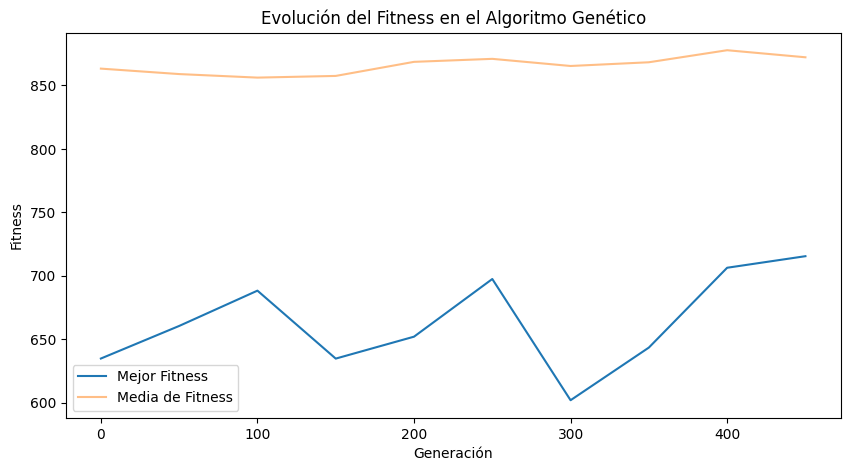

Mejor Solución Encontrada en la Generación 4 con un Fitness de 548.5206738814943
Camino: [['Birmingham' 'Berlin' 'Milan' 'Minsk' 'Paris' 'Rome' 'London' 'Munich'
  'Kyiv' 'Budapest' 'Istanbul' 'Prague' 'Amsterdam' 'Sofia' 'Barcelona'
  'Vienna' 'Brussels' 'Moscow' 'Bucharest' 'Warsaw']]


In [25]:
for i in range(generaciones):
    # Resto de tu código...

    # Después de actualizar mutated_pop
    fitnes_list = get_all_fitnes(mutated_pop, cities_dict)

    # Resto de tu código...

# Al final del proceso del algoritmo genético...

# Graficar el Mejor y el Promedio de Fitness
plt.figure(figsize=(10, 5))
plt.plot(generacion, minimos, label='Mejor Fitness')
plt.plot(generacion, medias, label='Media de Fitness', alpha=0.5)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.title('Evolución del Fitness en el Algoritmo Genético')
plt.legend()
plt.show()

# Presentar el Mejor Camino
print(f"Mejor Solución Encontrada en la Generación {best_solution[0]} con un Fitness de {best_solution[1]}")
print("Camino:", best_solution[2])

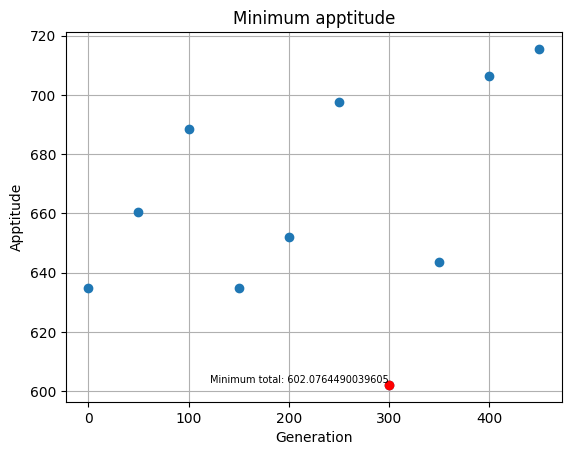

In [26]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

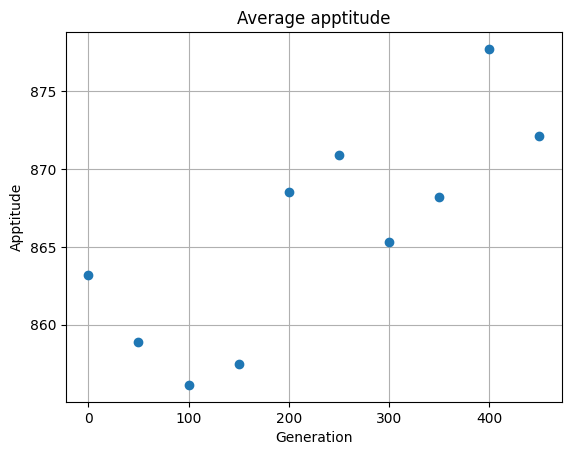

In [27]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)



### 7.2.2 1.000 Gens Tournament selection

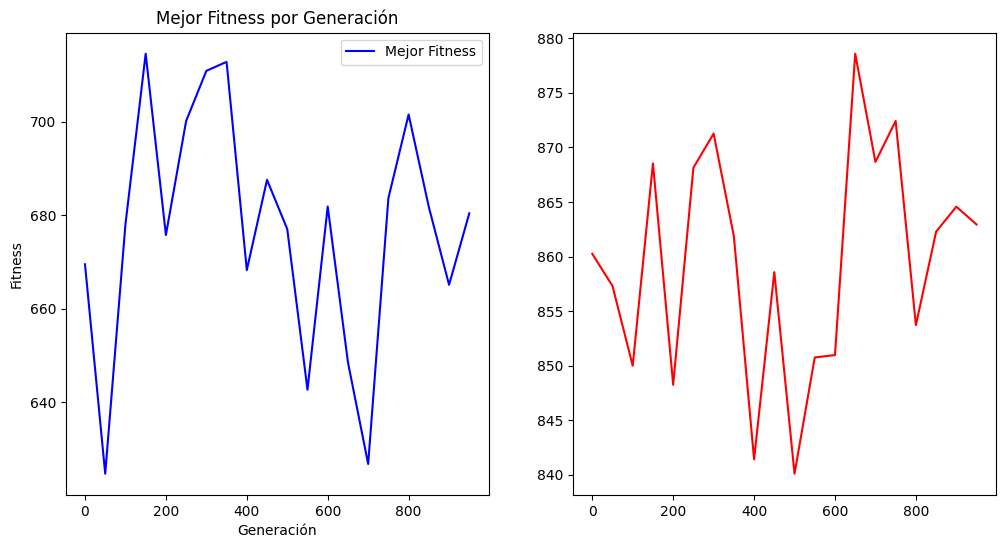

In [28]:
import numpy as np
import matplotlib.pyplot as plt

best_solution = [-1, np.inf, np.array([])]
generaciones = 1000
generacion = []
minimos = []
medias = []

for i in range(generaciones):
    # Asumiendo que mutated_pop se inicializa correctamente antes del bucle

    fitnes_list = get_all_fitnes(mutated_pop, cities_dict)

    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    if i % 50 == 0:
        generacion.append(i)
        minimos.append(fitnes_list.min())
        medias.append(fitnes_list.mean())

    progenitor_list = tournament_selection(population_set, fitnes_list, 7)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Graficar el mejor fitness
plt.subplot(1, 2, 1)
plt.plot(generacion, minimos, color='blue', label='Mejor Fitness')
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.title('Mejor Fitness por Generación')
plt.legend()

# Graficar el fitness medio
plt.subplot(1, 2, 2)
plt.plot(generacion, medias, color='red', label='Fitness Medio')



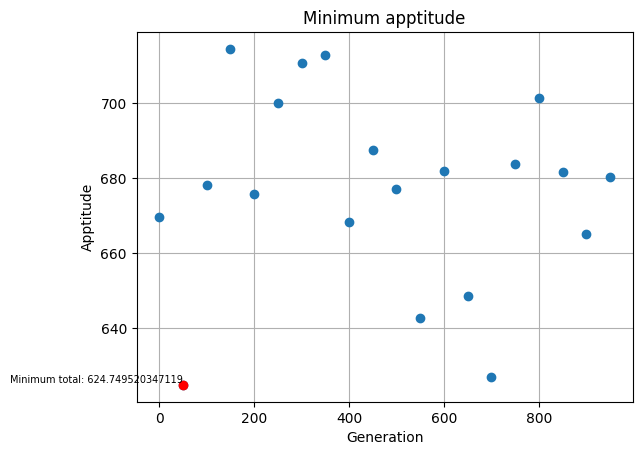

In [31]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

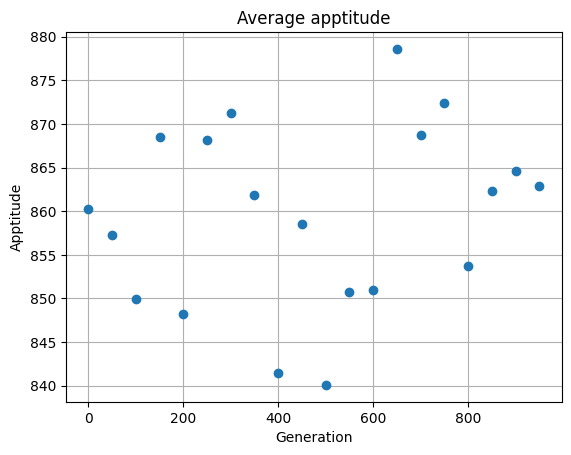

In [30]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)


##We change the number of generations
### 7.2.3 500 Gens Tournament selection

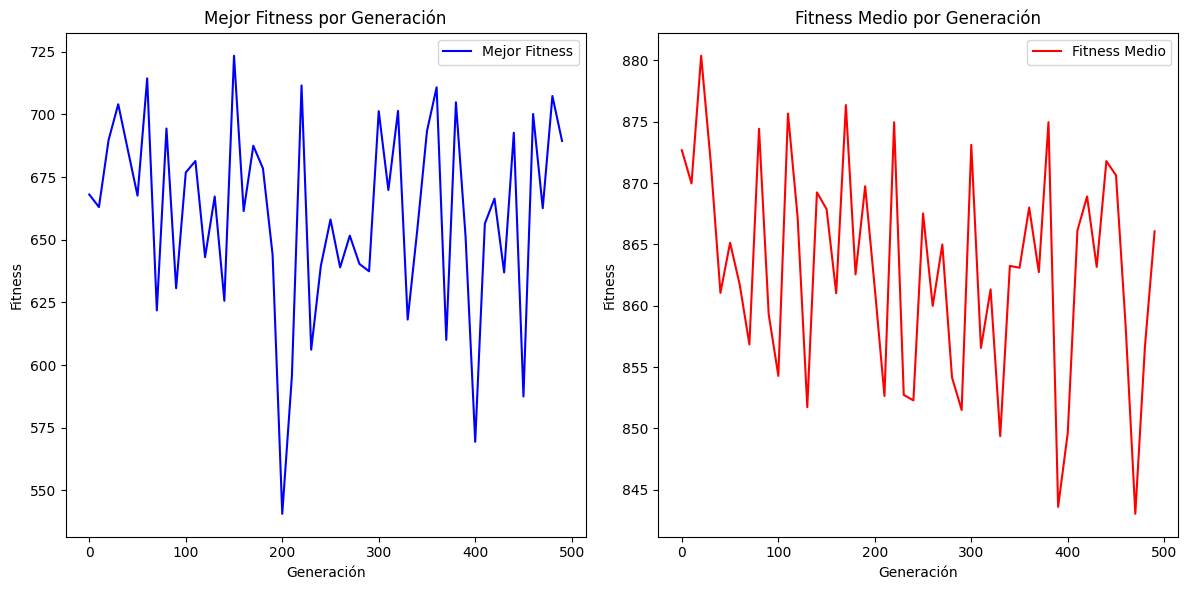

Mejor Solución Encontrada en la Generación 26 con un Fitness de 514.5585922383639


In [32]:
import numpy as np
import matplotlib.pyplot as plt

best_solution = [-1, np.inf, np.array([])]
generaciones = 500
generacion = []
minimos = []
medias = []

for i in range(generaciones):
    # Asegúrate de que mutated_pop esté inicializado correctamente antes de este bucle

    fitnes_list = get_all_fitnes(mutated_pop, cities_dict)

    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    if i % 10 == 0:
        generacion.append(i)
        minimos.append(fitnes_list.min())
        medias.append(fitnes_list.mean())

    progenitor_list = tournament_selection(population_set, fitnes_list, 7)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar el mejor fitness
plt.subplot(1, 2, 1)
plt.plot(generacion, minimos, color='blue', label='Mejor Fitness')
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.title('Mejor Fitness por Generación')
plt.legend()

# Graficar el fitness medio
plt.subplot(1, 2, 2)
plt.plot(generacion, medias, color='red', label='Fitness Medio')
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.title('Fitness Medio por Generación')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar la mejor solución encontrada
print(f"Mejor Solución Encontrada en la Generación {best_solution[0]} con un Fitness de {best_solution[1]}")


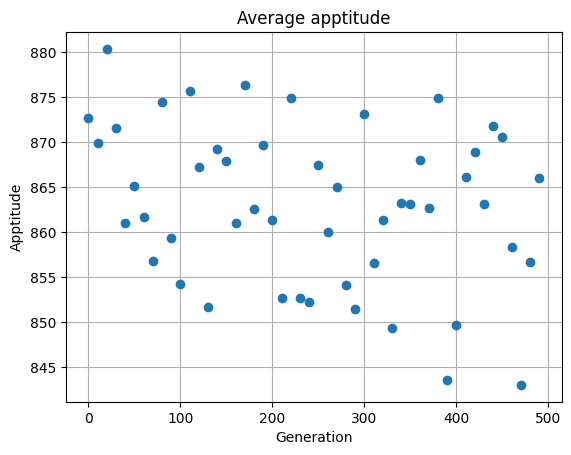

In [33]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

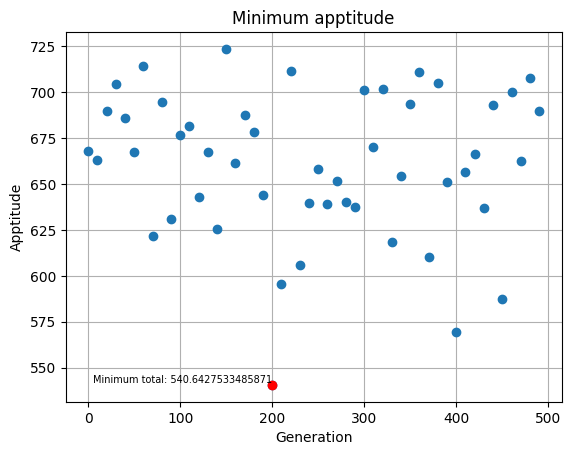

In [34]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

## 7.3 Elitist Selection
We change the selection type to an elitist selection, in this approach, the best individuals in the population are selected to pass directly to the next generation unchanged. This ensures that the fittest solutions are never lost.

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def tournament_selection(population_set, fitnes_list, tournament_size):
    progenitor_list_a = []
    progenitor_list_b = []
    selected_for_tournament_fitness = []

    for _ in range(len(population_set)):
        # Elegir dos individuos aleatoriamente para el torneo
        tournament_indices = np.random.choice(len(population_set), size=tournament_size, replace=False)
        tournament_fitness = [fitnes_list[i] for i in tournament_indices]
        selected_for_tournament_fitness.extend(tournament_fitness)

        # Seleccionar al individuo con la aptitud más alta en el torneo como progenitor A
        progenitor_a_index = tournament_indices[np.argmax(tournament_fitness)]
        progenitor_list_a.append(population_set[progenitor_a_index])

        # Elegir nuevamente a los participantes para el torneo (puede ser el mismo individuo)
        tournament_indices = np.random.choice(len(population_set), size=tournament_size, replace=False)
        tournament_fitness = [fitnes_list[i] for i in tournament_indices]
        selected_for_tournament_fitness.extend(tournament_fitness)

        # Seleccionar al individuo con la aptitud más alta en el torneo como progenitor B
        progenitor_b_index = tournament_indices[np.argmax(tournament_fitness)]
        progenitor_list_b.append(population_set[progenitor_b_index])

    # Visualización
    plt.figure(figsize=(12, 6))
    plt.hist(fitnes_list, bins=30, alpha=0.5, label='Fitness de la Población')
    plt.scatter(selected_for_tournament_fitness, np.zeros_like(selected_for_tournament_fitness), color='red', label='Fitness Seleccionado para Torneo')
    plt.xlabel('Fitness')
    plt.ylabel('Frecuencia')
    plt.title('Distribución del Fitness y Selección de Torneo')
    plt.legend()
    plt.show()

    return np.array([progenitor_list_a, progenitor_list_b])


